In [1]:
import numpy as np
import pandas as pd
import json
import math
import random
import xlrd
import scipy
from scipy.stats import norm
from scipy.optimize import minimize

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, WhiteKernel)

import matplotlib.pyplot as plt

from sklearn import preprocessing

import GPy
import seaborn as sns
random.seed(1235)

In [2]:
def UCB(X, gpr, beta):
    mu, sigma = gpr.predict(X, return_std=True)
    print(mu)
    print(sigma)
    return mu + beta * sigma

In [3]:
def LCB(X, gpr, beta):
    mu, sigma = gpr.predict(X, return_std=True)
        
    return mu - beta * sigma

In [4]:
def propose_location(gpr, bnds,dim, n_restarts=25):
    
    min_val = 1
    min_x = None
    
    def min_obj(X):
        acq_tot = - UCB(X.reshape(1,-1), gpr, 0.5) #.reshape(1,-1)
        print(acq_tot)
        return acq_tot[0,0]
    
    for x0 in np.random.uniform(bnds[:, 0], bnds[:, 1], size=(n_restarts, dim)):
        res = minimize(min_obj,x0 = x0,method='bfgs',bounds = bounds, 
                            options = {'verbose': 1})  

        if res.fun < min_val:
            min_val = res.fun
            min_x = res.x           
    
    return min_x.reshape(1, -1), min_val

In [5]:
Factors_Bounds = pd.read_excel('cytokinesInBlood.xlsx')
N_factors = Factors_Bounds.shape[0]
dim = N_factors
Names = Factors_Bounds.iloc[:,0].values.tolist()

bounds = np.zeros((dim, 2))
for i in range(dim):
    bounds[i,1] = Factors_Bounds.iloc[i,1]

In [6]:
Input0 = pd.read_csv('0_Cytokine_ExperimentalPlan.csv').iloc[:,1:]

Output0 = pd.read_excel('Results_cytokines_Round0.xlsx')
Diff = np.abs(Output0.iloc[2:,3:6] - Output0.iloc[0, 3:6])
Diff_frac = np.abs((Output0.iloc[2:,3:6] - Output0.iloc[0, 3:6])/Output0.iloc[0, 3:6])

y = Diff_frac.sum(axis = 1).values.reshape(-1,1)

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWar

[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]
[[-0.6091362]]
[[0.]]
[1.21827241]


 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342901]]
[0.9548629]
[[-1.21086046]]
[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342902]]
[0.9548629]
[[-1.21086047]]
[[0.73342901]]
[0.9548629]
[[-1.21086046]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.7887969]]
[0.9217686]
[[-1.2496812]]
[[0.88826926]]
[0.85248705]
[[-1.31451279]]
[[0.88826926]]
[0.85248705]
[[-1.31451279]]
[[0.88826926]]
[0.85248705]
[[-1.31451279]]
[[0.88826926]]
[0.85248705]
[[-1.31451279]]
[[0.88826926]]
[0.85248705]
[[-1.31451279]]
[[0.88826926]]
[0.852487

[[1.2215354]]
[0.45655132]
[[-1.44981106]]
[[1.2215354]]
[0.45655132]
[[-1.44981106]]
[[1.2215354]]
[0.45655132]
[[-1.44981106]]
[[1.2215354]]
[0.45655132]
[[-1.44981106]]
[[1.2215354]]
[0.45655132]
[[-1.44981106]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.4520657]
[[-1.44982548]]
[[1.22379263]]
[0.45206571]
[[-1.44982548]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232406]
[[-1.44982659]]
[[1.22366456]]
[0.45232407]
[[-1.44982659]]
[

[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376455]]
[0.45218242]
[[-1.44985576]]
[[1.22376456]]
[0.45218241]
[[-1.44985576]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202643]
[[-1.44985687]]
[[1.22384366]]
[0.45202642]
[[-1.44985687]]
[[1.22416839]]
[0.45137975]
[[-1.44985826]]
[[1.22416839]]
[0.45137975]
[[-1.44985826]]
[[1.22416839]]
[0.45137975]
[[-1.44985826]]
[[1.22416839]]
[0.45137975]
[[-1.44985826]]
[[1.22416839]]
[0.45137975]
[[-1

[0.45139362]
[[-1.4498697]]
[[1.22417289]]
[0.45139362]
[[-1.4498697]]
[[1.22417289]]
[0.45139362]
[[-1.4498697]]
[[1.22417289]]
[0.45139362]
[[-1.4498697]]
[[1.22417289]]
[0.45139361]
[[-1.4498697]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128432]
[[-1.44986971]]
[[1.22422755]]
[0.45128431]
[[-1.44986971]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.2976546]]
[1.10162054]
[[-0.84846487]]
[[0.32761626]]
[1

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.59119522]
[[-1.20845536]]
[[0.91285775]]
[0.59119522]
[[-1.20845536]]
[[0.91285775]]
[0.59119522]
[[-1.20845536]]
[[0.91285775]]
[0.59119522]
[[-1.20845536]]
[[0.91285775]]
[0.59119523]
[[-1.20845536]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495894]
[[-1.20854525]]
[[0.91106578]]
[0.59495895]
[[-1.20854525]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791571]
[[-1.208565]]
[[0.90960714]]
[0.59791572]
[[-1.208565]]
[[0.90806161]]
[0.60

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.83275208]
[[-1.32974576]]
[[0.91336972]]
[0.83275208]
[[-1.32974576]]
[[0.91336972]]
[0.83275208]
[[-1.32974576]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282479]]
[0.8927784]
[[-1.27921398]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282479]]
[0.8927784]
[[-1.27921399]]
[[0.83282478]]
[0.8927784]
[[-1.27921398]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.92165434]]
[0.82598448]
[[-1.33464658]]
[[0.9019474]]
[0.84184533]
[[-1.32287007]]
[[0.9019474]]
[0.84184533]
[[-1.32287007]]
[[0.9019474]]

[0.45200156]
[[-1.44984883]]
[[1.22384805]]
[0.45200156]
[[-1.44984883]]
[[1.22384805]]
[0.45200156]
[[-1.44984883]]
[[1.22384805]]
[0.45200156]
[[-1.44984883]]
[[1.22384805]]
[0.45200156]
[[-1.44984883]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389507]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191167]
[[-1.44985091]]
[[1.22389508]]
[0.45191166]
[[-1.44985091]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1.22431113]]
[0.45108329]
[[-1.44985278]]
[[1

[0.45171439]
[[-1.44986349]]
[[1.22400629]]
[0.45171439]
[[-1.44986349]]
[[1.2240063]]
[0.45171439]
[[-1.44986349]]
[[1.2240063]]
[0.45171439]
[[-1.44986349]]
[[1.2240063]]
[0.45171439]
[[-1.44986349]]
[[1.2240063]]
[0.45171439]
[[-1.44986349]]
[[1.2240063]]
[0.45171438]
[[-1.44986349]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377901]]
[0.45216989]
[[-1.44986396]]
[[1.22377902]]
[0.45216988]
[[-1.44986396]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.22406411]]
[0.45160106]
[[-1.44986464]]
[[1.2240

[[1.22413557]]
[0.45146666]
[[-1.4498689]]
[[1.22413557]]
[0.45146666]
[[-1.4498689]]
[[1.22413557]]
[0.45146666]
[[-1.4498689]]
[[1.22413557]]
[0.45146666]
[[-1.4498689]]
[[1.22413557]]
[0.45146666]
[[-1.4498689]]
[[1.22413558]]
[0.45146665]
[[-1.4498689]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389724]]
[0.45194337]
[[-1.44986893]]
[[1.22389725]]
[0.45194336]
[[-1.44986893]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[1.22409334]]
[0.4515513]
[[-1.44986899]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.52054571]
[[-1.2592133]]
[[0.99894044]]
[0.52054571]
[[-1.2592133]]
[[0.99894045]]
[0.5205457]
[[-1.2592133]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938893]]
[0.51964964]
[[-1.25921375]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938893]]
[0.51964965]
[[-1.25921375]]
[[0.99938894]]
[0.51964964]
[[-1.25921375]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.99937489]]
[0.51967773]
[[-1.25921376]]
[[0.9993749]]
[0.51967772]
[[-1.25921376]]
[[1.30343696]]
[0.23669356]
[[-1.42178374]]
[[1.30343696]]
[0.23669356]
[[-1.42178374]]
[[1.303

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03263277]]
[1.14359746]
[[-0.6044315]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03281442]]
[1.1435918]
[[-0.60461032]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.03357107]]
[1.14356799]
[[-0.60535506]]
[[0.

[[1.22419119]]
[0.45133842]
[[-1.4498604]]
[[1.22419119]]
[0.45133842]
[[-1.4498604]]
[[1.22419119]]
[0.45133842]
[[-1.4498604]]
[[1.22419119]]
[0.45133842]
[[-1.4498604]]
[[1.22419119]]
[0.45133842]
[[-1.4498604]]
[[1.2241912]]
[0.45133841]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134819]
[[-1.4498604]]
[[1.22418631]]
[0.45134818]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418146]]
[0.45135788]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418147]]
[0.45135788]
[[-1.4498604]]
[[1.22418147

[[1.22398333]]
[0.45176832]
[[-1.44986749]]
[[1.22398333]]
[0.45176832]
[[-1.44986749]]
[[1.22398333]]
[0.45176832]
[[-1.44986749]]
[[1.22398333]]
[0.45176832]
[[-1.44986749]]
[[1.22398333]]
[0.45176832]
[[-1.44986749]]
[[1.22398333]]
[0.45176832]
[[-1.44986749]]
[[1.22398334]]
[0.45176831]
[[-1.44986749]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.2239512]]
[0.45183323]
[[-1.44986782]]
[[1.22395121]]
[0.45183322]
[[-1.44986782]]
[[1.22421602]]
[0.45130442]
[[-1.44986823]]
[[1.22421602]]
[0.45130442]
[[-1.44986823]]
[[1.22421602]]
[0.45130442]
[[-1.44986823]]
[[1.22421602]]
[0.45130442]
[[-1.44986823]]
[[1.22421602]]
[0.45130442]
[[-1.44986823]]
[[1.22421602]]
[0.45130442]
[[-1.44986823]]
[[1.22421602]]
[0.45130442]
[[-1.4498682

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.60016443]
[[-1.20849548]]
[[0.90841327]]
[0.60016443]
[[-1.20849548]]
[[0.90841327]]
[0.60016443]
[[-1.20849548]]
[[0.90841326]]
[0.60016443]
[[-1.20849548]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983844]
[[-1.2085253]]
[[0.90860608]]
[0.59983845]
[[-1.2085253]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992448]
[[-1.20855344]]
[[0.9085912]]
[0.59992449]
[[-1.20855344]]
[[0.90843938]]
[0.60023957]
[[-1.20855916]]
[[0.90843938]]
[0.60

[[0.90798012]]
[0.60117183]
[[-1.20856603]]
[[0.90798012]]
[0.60117183]
[[-1.20856603]]
[[0.90798012]]
[0.60117183]
[[-1.20856603]]
[[0.90798012]]
[0.60117183]
[[-1.20856603]]
[[0.90798011]]
[0.60117184]
[[-1.20856603]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115973]
[[-1.20856763]]
[[0.90798776]]
[0.60115974]
[[-1.20856763]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115008]
[[-1.20856994]]
[[0.9079949]]
[0.60115009]
[[-1.20856994

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.72641556]
[[-1.22987725]]
[[0.86666946]]
[0.72641556]
[[-1.22987725]]
[[0.86666946]]
[0.72641556]
[[-1.22987725]]
[[0.86666946]]
[0.72641556]
[[-1.22987725]]
[[0.86666946]]
[0.72641556]
[[-1.22987725]]
[[0.86666946]]
[0.72641557]
[[-1.22987724]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968381]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99938854]]
[0.51968382]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[0.99935854]]
[0.51974383]
[[-1.25923045]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWar

[[3.68457566e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457567e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457565e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457569e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457559e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457566e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457566e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457567e-16]]
[1.13489197]
[[-0.56744598]]
[[3.68457563e-16]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425396e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425397e-21]]
[1.13489197]
[[-0.56744598]]
[[1.02425394e-21]]
[1.13489197]
[[-0.56744598]]
[[3.92936352e-16]]
[1.13489197]
[[-0.56744598]]
[[3.92936353e-16]]
[1.13489197]
[[-0.56744598]]
[[3.92936356e-16]]
[1.13489197]
[[-0.567

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 0 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 3 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-package

[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.38819444]]
[0.22182413]
[[-0.49910651]]
[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.38819444]]
[0.22182412]
[[-0.4991065]]
[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.38819444]]
[0.22182413]
[[-0.4991065]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475973]]
[0.26792766]
[[-0.66872356]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[0.53475974]]
[0.26792766]
[[-0.66872357]]
[[1.19148294]]
[0.29863427]
[[-1.34080007]]
[[1.19148294]]
[0.29863427]
[[-1.34080007]]
[[1.19148294]]
[0.29863427]
[[-1.34080007]]
[[1.19148294]]
[0.29863427]
[[-1.34080007]]
[[1.19148294]]
[0.29863427]
[[-1.3408000

[[1.18854461]]
[0.23200458]
[[-1.3045469]]
[[1.18854461]]
[0.23200459]
[[-1.3045469]]
[[1.18854461]]
[0.23200459]
[[-1.3045469]]
[[1.18854461]]
[0.23200459]
[[-1.3045469]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.19301682]]
[0.22943536]
[[-1.3077345]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.19301682]]
[0.22943535]
[[-1.30773449]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.19301682]]
[0.22943536]
[[-1.30773449]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.20678813]]
[0.2238401]
[[-1.31870818]]
[[1.21608644]]
[0.25711015]
[[-1.34464152]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290486]]
[0.30337655]
[[-0.83459313]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[0.68290487]]
[0.30337655]
[[-0.83459314]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094139]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.10719626]]
[0.24749024]
[[-1.23094138]]
[[1.22389019]]
[0.27041595]
[[-1.35909817]]
[[1.22389019]]
[0.27041595]
[[-1.35909817]]
[[1.22389019]]
[0.27041595]
[[-1.35909817]]
[[1.22389019]]
[0.27041595]
[[-1.35909817]]
[[1.22389019]]
[0.27041595]
[[-1

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.13764371]]
[0.27197566]
[[-1.27363154]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.1397018]]
[0.26933881]
[[-1.2743712]]
[[1.14748101]]
[0.25872918]
[[-1.2768456]]
[[1.14748101]]
[0.25872918]
[[-1.2768456]]
[[1.14748101]]
[0.25872918]
[[-1.2768456]]
[[1.14748101]]
[0.25872918]
[[-1.2768456]]
[[1.14748101]]
[0.25872918]
[[-1.2768456]]
[[1.1474810

[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19271989]]
[0.24205928]
[[-1.31374953]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.19353735]]
[0.31973419]
[[-1.35340445]]
[[1.08440479]]
[0.58363398]
[[-1.37622178]]
[[1.08440479]]
[0.58363398]
[[-1.37622178]]
[[1.08440479]]
[0.58363398]
[[-1.37622178]]
[[1.08440479]]
[0.58363398]
[[-1.37622178]]
[[1.08440479]]
[0.58363398]
[[-1.37622178]]
[[1.08440479]]
[0.58363398]
[[-1

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.16711142]]
[0.55786449]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.1671112]]
[0.55786493]
[[-1.44604366]]
[[1.14107888]]
[0.14769421]
[[-1.21492598]]
[[1.14107888]]
[0.14769421]
[[-1.21492598]]
[[1.14107888]]
[0.14769421]
[[-1.21492598]]
[[1.14107888]]
[0.14769421]
[[-1.21492598]]
[[1.14107888]]
[0.14769421]
[[-1.21492598

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.2487479]
[[-1.28465469]]
[[1.16028074]]
[0.2487479]
[[-1.28465469]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16008952]]
[0.24971602]
[[-1.28494753]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16008952]]
[0.24971602]
[[-1.28494753]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16008952]]
[0.24971603]
[[-1.28494753]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16046522]]
[0.25004157]
[[-1.28548601]]
[[1.16170086]]
[0.24960396]
[[-1.28650284]]
[[1.16170086]]
[0.24960396]
[[-1.28650284]]
[[1.16170086]]
[0.24960396]
[[-1.28650284]]
[[1.

[[1.01662191]]
[0.61810737]
[[-1.3256756]]
[[1.01662192]]
[0.61810737]
[[-1.32567561]]
[[1.01662192]]
[0.61810737]
[[-1.32567561]]
[[1.01662192]]
[0.61810737]
[[-1.32567561]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.21368111]]
[0.53700124]
[[-1.48218173]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.2159183]]
[0.53547286]
[[-1.48365473]]
[[1.224818]]
[0.52934104]
[[-1.48948852]]


 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 5 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 6 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-package

[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.4734207]]
[0.2329869]
[[-0.58991415]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.47342069]]
[0.2329869]
[[-0.58991414]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323186]]
[0.33377701]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[0.90323185]]
[0.333777]
[[-1.07012036]]
[[1.2829208]]
[0.35794403]
[[-1.46189282]]
[[1.2829208]]
[0.35794403]
[[-1.46189282]]
[[1.2829208]]
[0.35794403]
[[-1.46189282]]
[[1.2829208]]
[0.35794403]
[[-1.46189282]]
[[1.2829208]]
[0.35794403]
[[-1.46189282]]
[[1.2829208]]
[0.35

[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33057743]]
[0.34369095]
[[-1.50242291]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33230475]]
[0.34256305]
[[-1.50358627]]
[[1.33539431]]
[0.34075527]
[[-1.50577194]]
[[1.33539431]]
[0.34075527]
[[-1.50577194]]
[[1.33539431]]
[0.34075527]
[[-1.50577194]]
[[1.33539431]]
[0.34075527]
[[-1.50577194]]
[[1.33539431]]
[0.34075527]
[[-1.50577194]]
[[1

[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76932112]]
[0.37237053]
[[-1.95550639]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76908484]]
[0.3728464]
[[-1.95550804]]
[[1.76906529]]
[0.37288556]
[[-1.95550807]]
[[1.76906529]]
[0.37288556]
[[-1.95550807]]
[[1.76906529]]
[0.37288556]
[[-1.95550807]]
[[1.76906529]]
[0.37288556]
[[-1.95550807]]
[[1.76906529]]
[0.37288556]
[[-1.95550807

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[-1.91549052]]
[[1.69969674]]
[0.43158757]
[[-1.91549052]]
[[1.69969674]]
[0.43158757]
[[-1.91549052]]
[[1.69969674]]
[0.43158757]
[[-1.91549052]]
[[1.69969674]]
[0.43158757]
[[-1.91549052]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.58055657]]
[0.53874232]
[[-1.84992773]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69299887]]
[0.45205318]
[[-1.91902547]]
[[1.69313889]]
[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[[-1.37915204]]
[[1.20151933]]
[0.35526542]
[[-1.37915204]]
[[1.20151933]]
[0.35526542]
[[-1.37915204]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.22568525]]
[0.34139657]
[[-1.39638354]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143658]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.27143659]]
[0.30216642]
[[-1.4225198]]
[[1.33493413]]
[0.24117371]
[[-1.45552099]]
[[1.33493413]]
[0.24117371]
[[-1.45552098]]
[[1.33493413]]
[0.241173

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.34622305]
[[-1.63671937]]
[[1.46360784]]
[0.34622305]
[[-1.63671937]]
[[1.46360784]]
[0.34622305]
[[-1.63671937]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.47015084]]
[0.356045]
[[-1.64817334]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.471693]]
[0.35612507]
[[-1.64975554]]
[[1.47198079]]
[0.35610221]
[[-1.6500319]]
[[1.47198079]]
[0.35610221]
[[-1.6500319]]
[[1.47198079]]
[0.35610221]
[[-1.6500319

[[-1.95550417]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76912168]]
[0.37277267]
[[-1.95550801]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76907106]]
[0.3728742]
[[-1.95550816]]
[[1.76906593]]
[0.37288445]
[[-1.95550816]]
[[1.76906593]]
[0.37288445]
[[-1.95550816]]
[[1.76906593]]
[0.37288445]
[[-1.95550816]]
[[1.76906593]]
[0.37288445]
[[-1.95550816]]
[[1.76906593]]
[0.3728844

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[[1.72145908]]
[0.4291823]
[[-1.93605022]]
[[1.72145908]]
[0.4291823]
[[-1.93605022]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72156399]]
[0.42904742]
[[-1.9360877]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72194651]]
[0.42851803]
[[-1.93620552]]
[[1.72268438]]
[0.42762303]
[[-1.9364959]]
[[1.72268438]]
[0.42762303]
[[-1.9364959]]
[[1.72268438]]
[0.42762303]
[[-1.9364959]]
[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31057326]]
[0.34093782]
[[-1.48104217]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31324552]]
[0.33952269]
[[-1.48300687]]
[[1.31818851]]
[0.33689287]
[[-1.48663495]]
[[1.31818851]]
[0.33689287]
[[-1.48663495]]
[[1.31818851]]
[0.33689287]
[[-1.48663495]]
[[1.31818851]]
[0.33689287]
[[-1.48663495]]
[[1.31818851]]
[0.33689287]
[[-1.48663495]]
[[1.31818851]]
[0.33689287]
[[-1.48663495]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.37899142]
[[-1.67869427]]
[[1.48919856]]
[0.37899142]
[[-1.67869427]]
[[1.48919856]]
[0.37899142]
[[-1.67869427]]
[[1.48919856]]
[0.37899142]
[[-1.67869427]]
[[1.48919856]]
[0.37899142]
[[-1.67869427]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.52373121]]
[0.36658272]
[[-1.70702257]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601635]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[1.57706094]]
[0.35791083]
[[-1.75601636]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.35520349]
[[-1.46186616]]
[[1.28426442]]
[0.35520349]
[[-1.46186616]]
[[1.28426442]]
[0.35520349]
[[-1.46186616]]
[[1.28426442]]
[0.35520349]
[[-1.46186616]]
[[1.28426442]]
[0.35520349]
[[-1.46186616]]
[[1.28426442]]
[0.35520349]
[[-1.46186616]]
[[1.28426442]]
[0.35520349]
[[-1.46186616]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28441754]]
[0.35512657]
[[-1.46198083]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[1.28468401]]
[0.35501283]
[[-1.46219042]]
[[

[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75870805]]
[0.38952854]
[[-1.95347232]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.75967113]]
[0.38824293]
[[-1.9537926]]
[[1.75967113]]
[0.38824293]
[[-1.9537926]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.75967114]]
[0.38824293]
[[-1.9537926]]
[[1.76169041]]
[0.3852639]
[[-1.95432237]]
[[1.76169041]]
[0.3852639]
[[-1.95432236]]
[[1.76169041]]
[0.3852639]
[[-1.95432237]]
[[1.76169041]]
[0.3852639]
[[-1.95432237]]
[[1.76169041]]
[0.3852639]
[[-1.95432237]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76495328]]
[0.37995609]
[[-1.95493133]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76504833]]
[0.37977257]
[[-1.95493461]]
[[1.76517595]]
[0.37952981]
[[-1.95494085]]
[[1.76517595]]
[0.37952981]
[[-1.95494085]]
[[1.76517595]]
[0.37952981]
[[-1.95494085]]
[[1.76517595]]
[0.37952981]
[[-1.95494085]]
[[1.76517595]]
[0.37952981]
[[-1.95494085]]
[[1.76517595]]
[0.37952981]
[[-1.95494085]]
[[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning:The optimal value found for dimension 2 of parameter k1__k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning:The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163448]]
[0.21514774]
[[-0.35920836]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.25163447]]
[0.21514774]
[[-0.35920835]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.69455261]]
[0.28838899]
[[-0.8387471]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[0.6945526]]
[0.28838899]
[[-0.83874709]]
[[1.22519442]]
[0.33212712]
[[-1.39125798]]
[[1.22519442]]
[0.33212712]
[[-1.39125798]]
[[1.22519442]]
[0.33212712]
[[-1.39125798]]
[[1.22519442]]
[0.33212712]
[[-1.39125798]]
[[1.22519442]]
[0.33212712]
[[-1.39125798

[[-1.85046957]]
[[1.73259947]]
[0.23574021]
[[-1.85046957]]
[[1.73259947]]
[0.23574021]
[[-1.85046957]]
[[1.73259947]]
[0.23574021]
[[-1.85046957]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73233418]]
[0.23654773]
[[-1.85060805]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73214608]]
[0.2374183]
[[-1.85085523]]
[[1.73222907]]
[0.23809979]
[[-1.85127896]]
[[1.73222907]]
[0.2380997

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.3300227]
[[-1.66075589]]
[[1.49574454]]
[0.3300227]
[[-1.66075589]]
[[1.49574454]]
[0.3300227]
[[-1.66075589]]
[[1.49574454]]
[0.3300227]
[[-1.66075589]]
[[1.49574454]]
[0.3300227]
[[-1.66075589]]
[[1.49574454]]
[0.3300227]
[[-1.66075589]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.49758202]]
[0.32958553]
[[-1.66237478]]
[[1.50099738]]
[0.32879486]
[[-1.66539481]]
[[1.50099738]]
[0.32879485]
[[-1.66539481]]
[[1.50099738]]
[0.32879485]
[[-1.66539481]]
[[1.50099738]]
[0.32879486]
[[-1.66539481]]
[[1.50099738]]
[0.32879486]
[[-1.66539481]]
[[1.50099738]]
[0.32879486]
[[-1.66539481]]
[[1.50099738]]
[0.32879486]
[[-1.66539481]]
[[1.50099738]]
[0.32879486]
[[-1.66539481]]
[[1.5009

[[1.74267234]]
[0.24273099]
[[-1.86403783]]
[[1.74267234]]
[0.24273099]
[[-1.86403783]]
[[1.74267234]]
[0.24273099]
[[-1.86403783]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74264028]]
[0.24279617]
[[-1.86403837]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74260203]]
[0.24287279]
[[-1.86403842]]
[[1.74259165]]
[0.24289355]
[[-1.86403843]]
[[1.74259165]]
[0.24289355]
[[-1

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.1905197]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.76152927]]
[0.19051969]
[[-1.85678912]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75259418]]
[0.21014672]
[[-1.85766754]]
[[1.75582449]]
[0.20392912]
[[-1.85778905]]
[[1.75582449]]
[0.20392912]
[[-1.85778905]]
[[1.75582449]]
[0.20392912]
[[-1.85778905]]
[[1.75582449]]
[0.20392912]
[[-1.85778905]]
[[1.75582449]]
[0.20392912]
[[-1.

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.30583238]
[[-1.226644]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027497]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.24810489]]
[0.32434015]
[[-1.41027496]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33045259]]
[0.31173002]
[[-1.4863176]]
[[1.33750433]]
[0.30598573]
[[-1.4904972]]
[[1.33750433]]
[0.30598573]
[[-1.4904972]]
[[1.33750433]]
[0.30598573]
[[-1.4904972]]
[[1.33750433]]
[0.30598573]
[[-1.4904972]]
[[1.33750433]]
[0

[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74820032]]
[0.21454078]
[[-1.85547071]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.21482441]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74806739]]
[0.2148244]
[[-1.85547959]]
[[1.74789429]]
[0.21520378]
[[-1.85549618]]
[[1.74789429]]
[0.21520378]
[[-1.85549618]]
[[1.74789429]]
[0.21520378]
[[-1.85549618]]
[[1.74789429]]
[0.21520378]
[[-1.85549618]]
[[1.74789429]]
[0.21520378]
[[-1.8554961

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.4408068]
[[-1.21456064]]
[[0.99415724]]
[0.4408068]
[[-1.21456064]]
[[0.99415724]]
[0.4408068]
[[-1.21456064]]
[[0.99415724]]
[0.4408068]
[[-1.21456064]]
[[0.99415724]]
[0.4408068]
[[-1.21456064]]
[[0.99415724]]
[0.4408068]
[[-1.21456064]]
[[0.99415724]]
[0.4408068]
[[-1.21456064]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.4334374]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.00122024]]
[0.43343739]
[[-1.21793894]]
[[1.02826224]]
[0.40265747]
[[-1.22959097]]
[[1.02826223]]
[0.40265747]
[[-1.22959097]]
[[1.02826224]]
[0.40265747]
[[-1.22959097]]
[[1.02826224]]
[0.40265747]
[[-1.22959097]]
[[1.02826224]]
[0.40265747]
[[-1.22959097]]
[[1.02826224]]
[0.40265747]
[[-1.22959097]]
[[1.02826224]]
[0.40265747]
[[-1.22959097]]
[[1.028262

[[1.75749419]]
[0.20180527]
[[-1.85839683]]
[[1.75749419]]
[0.20180527]
[[-1.85839683]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.2013121]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75803413]]
[0.20131209]
[[-1.85869018]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300086]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75772547]]
[0.20300085]
[[-1.8592259]]
[[1.75300823]]
[0.21412928]
[[-1.86007287]]
[[1.75300823]]
[0.21412928]
[[-1.86007287]]
[[1.75300823]]
[0.21412928]
[[-1.86007287]

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.55834418]]
[0.16875236]
[[-1.64272036]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.63535206]]
[0.17068806]
[[-1.72069609]]
[[1.73583913]]
[0.18537516]
[[-1.82852671]]
[[1.73583913]]
[0.18537516]
[[-1.82852671]]
[[1.73583913]]
[0.18537516]
[[-1.82852671]]
[[1.73583913]]
[0.18537516]
[[-1.82852671]]
[[1.73583913]]
[0.18537516]
[[-1

[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73339871]]
[0.25706651]
[[-1.86193197]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.73652683]]
[0.25245815]
[[-1.86275591]]
[[1.74232291]]
[0.24275929]
[[-1.86370255]]
[[1.74232291]]
[0.24275929]
[[-1.86370255]]
[[1.74232291]]
[0.24275929]
[[-1.86370255]]
[[1.74232291]]
[0.24275929]
[[-1.86370255]]
[[1.74232291]]
[0.24275929]
[[-1.86370255]]
[[1.74232291]]
[0.24275929]
[[-1.86370255]]
[[1.74232291]]
[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.21579466]
[[-1.855309]]
[[1.74741167]]
[0.21579466]
[[-1.855309]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74826357]]
[0.21466323]
[[-1.85559518]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.74980597]]
[0.21253301]
[[-1.85607248]]
[[1.75208158]]
[0.20958623]
[[-1.8568747]]
[[1.75208158]]
[0.20958623]
[[-1.8568747]]
[[1.75208158]]
[0.20958623]
[[-1.8568747]]
[[1.75208

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose


[[-1.72130288]]
[[1.62156737]]
[0.19947102]
[[-1.72130288]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584096]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.70917863]]
[0.21332465]
[[-1.81584095]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73722392]]
[0.22202331]
[[-1.84823558]]
[[1.73497945]]
[0.23023236]
[[-1.85009562]]
[[1.73497944]]
[0.23023236]
[[-1.85009562]]
[[1.73497945]]
[0.23023236]
[[-1.85009562]]
[[1.73497945]]
[

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.22832211]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.73617891]]
[0.2283221]
[[-1.85033996]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.7364094]]
[0.22800007]
[[-1.85040943]]
[[1.73683606]]
[0.22740297]
[[-1.85053754]]
[[1.73683605]]
[0.22740297]
[[-1.85053754]]
[[1.73683606]]
[0.22740297]
[[-1.85053754]]
[[1.73683606]]
[0.22740297]
[[-1.85053754]]
[[1.73683606]]
[0.22740297]
[[-1.85053754]]
[[1.73683606]]
[0.2

 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/scipy/optimize/_minimize.py:539: RuntimeWarning:Method bfgs cannot handle constraints nor bounds.
 /Users/harini/Desktop/python_venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: OptimizeWarning:Unknown solver options: verbose



[0.29066775]
[[-1.4621284]]
[[1.31679453]]
[0.29066775]
[[-1.4621284]]
[[1.31679453]]
[0.29066775]
[[-1.4621284]]
[[1.31679453]]
[0.29066775]
[[-1.4621284]]
[[1.31679453]]
[0.29066775]
[[-1.4621284]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.3178085]]
[0.29018256]
[[-1.46289978]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956142]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.31956583]]
[0.28956143]
[[-1.46434654]]
[[1.32273363]]
[

[[1.75713352]]
[0.20105842]
[[-1.85766273]]
[[1.75713352]]
[0.20105842]
[[-1.85766273]]
[[1.75713352]]
[0.20105842]
[[-1.85766273]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.75840774]]
[0.19870585]
[[-1.85776067]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76015203]]
[0.19555881]
[[-1.85793144]]
[[1.76217798]]
[0.19218367]
[[-1.85826981]]
[[1.76217798]]
[0.19218367]
[[-1

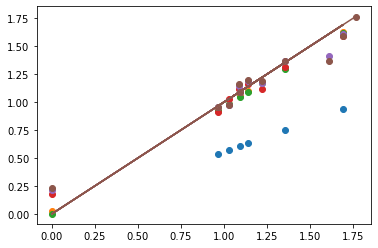

In [7]:
n_exp = 6

scaler_y = preprocessing.StandardScaler().fit(y)
scaled_y = scaler_y.fit_transform(y)
scaled_y = y
X_uniq = Input0.values
for i in range(n_exp):
    rbf = 1*Matern(length_scale= np.ones(dim), nu = 1.5) + WhiteKernel(
    noise_level=1e-2, noise_level_bounds=(1e-5, 1e1)) #

    gpr = GaussianProcessRegressor(kernel= rbf, n_restarts_optimizer=25, 
                                   normalize_y=False, alpha = 0.05)  
    
    gpr = gpr.fit(X_uniq, scaled_y)
    mu, sigma =  gpr.predict(X_uniq, return_std=True)
    
    plt.scatter(scaled_y, mu)
    plt.plot(scaled_y,scaled_y)
    
    X_exp, f_val = propose_location(gpr,bounds, dim, 10)
    X_uniq = np.concatenate((X_uniq, X_exp), axis = 0)
    scaled_y = np.concatenate((scaled_y, gpr.predict(X_exp)), axis = 0)
    

In [8]:
N_init = 6
Xnew = pd.DataFrame(X_uniq[N_init:N_init+n_exp,:], columns = Names)

print(Xnew)
print(scaled_y[N_init:N_init+n_exp])

       IL-7       IL-4      IL-3      IL-21      IL-2     IL-15      BAFF  \
0  0.129404   4.802500  8.986417  34.967444  3.952052  1.022705  0.319268   
1  0.305031   3.537159  1.826590  60.556887  2.026473  0.873522  0.101218   
2  0.268843   3.354380  1.685962  60.503684  2.011617  0.862261  0.090326   
3  0.698052  14.092576  0.137440  54.954021  6.274923  1.445065  0.287690   
4  1.238800  20.955385  4.281852  75.291822  3.934807  1.754302  0.774732   
5  1.256350  29.844315  0.514278  74.767146  1.956693  0.777231  0.333216   

       IL-12  
0  18.627443  
1   6.396755  
2   6.323832  
3  35.484439  
4  33.263379  
5  33.890505  
[[0.        ]
 [1.22422128]
 [1.08603677]
 [1.60979552]
 [1.76906902]
 [1.74259068]]


In [9]:
scaled_y

array([[1.35748504],
       [1.14303256],
       [1.02981828],
       [1.09254821],
       [0.96725381],
       [1.69294698],
       [0.        ],
       [1.22422128],
       [1.08603677],
       [1.60979552],
       [1.76906902],
       [1.74259068]])

In [10]:
rbf_2 = 1*Matern(length_scale= np.ones(dim), nu = 1.5) + WhiteKernel(noise_level=1e-2, noise_level_bounds=(1e-5, 1e1)) #
gpr_final = GaussianProcessRegressor(kernel= rbf_2, n_restarts_optimizer=25, normalize_y=False) 
gpr_final.fit(X_uniq[0:-6,:], scaled_y[0:-6])

mu_final, sigma_final = gpr_final.predict(X_uniq[-6:,:], return_std=True)

y_final = mu_final * scaler_y.scale_ + scaler_y.mean_
print(mu_final)
print(sigma_final)
print(y_final)


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[1.23862328 1.23862328 1.23862328 1.23862328 1.23862328 1.23862328]
[[1.21384748]
 [1.21384748]
 [1.21384748]
 [1.21384748]
 [1.21384748]
 [1.21384748]]


In [12]:
Round1_design_per_round = Xnew
pd.DataFrame(Round1_design_per_round, columns = Names).to_csv('1_Round1_CytokinePlan.csv')

In [ ]:
for i in range(3):
    plt.scatter(Diff.iloc[:, i], Diff_frac.iloc[:, i])

plt.figure()
plt.scatter(Diff.sum(axis = 1), Diff_frac.sum(axis = 1))

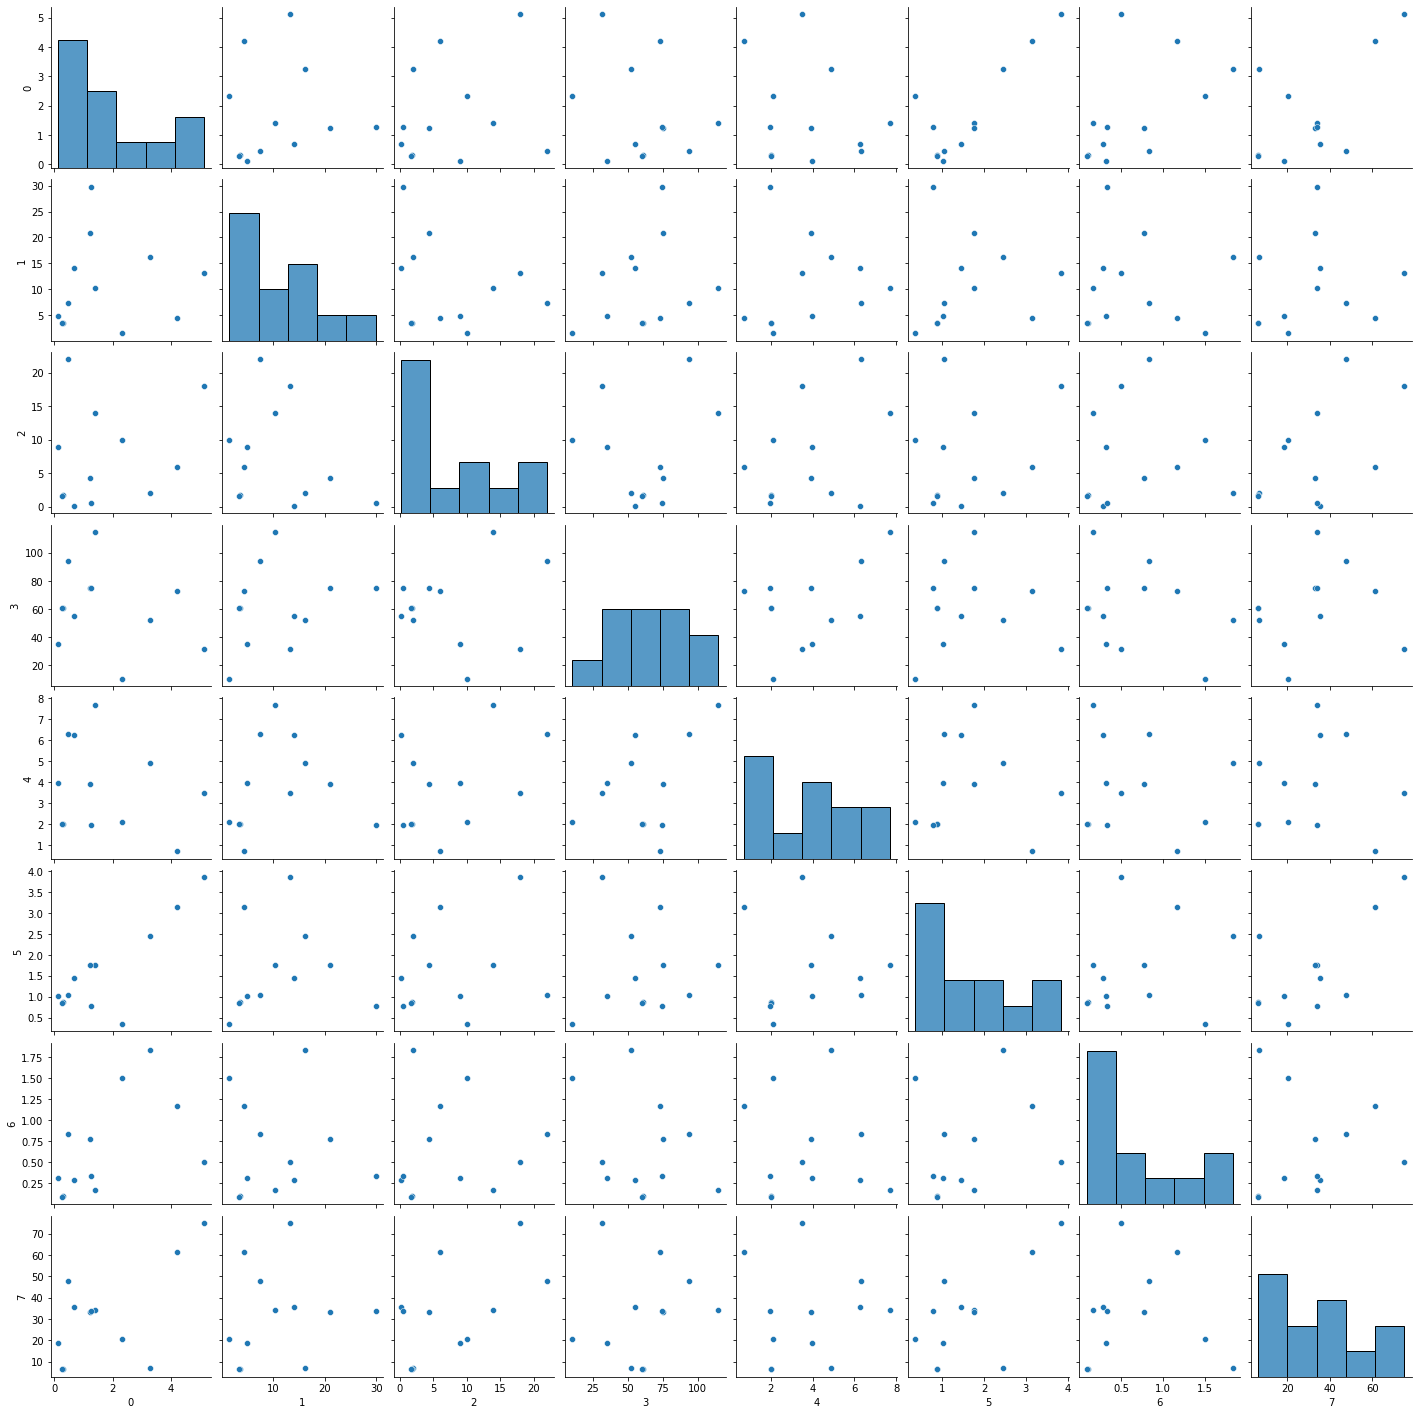

In [11]:
sns.pairplot(pd.DataFrame(X_uniq))

In [ ]:
sns.pairplot(Input0)
sns.pairplot(Xnew)